In [37]:
import tensorflow as tf
import numpy
import keras
import PIL
from PIL import Image

# Remove padding around screen

from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import sys
sys.path.insert(0, "/home/jason/sproj/scripts/")
import utils


display(HTML("<style>"
    + "#notebook { padding-top:0px !important; } " 
    + ".container { width:100% !important; } "
    + ".end_space { min-height:0px !important; } "
    + "</style>"))

In [38]:
model = keras.models.load_model('../outputs/track_cnnw3.h5')
model.compile("adadelta", loss='mean_absolute_error')

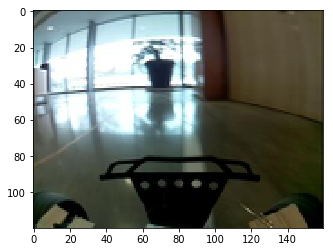

In [67]:
def load_image(infilename):
    size = 160,120
    img = Image.open(infilename)
    img.thumbnail(size, Image.ANTIALIAS)
    data = numpy.asarray(img,dtype="uint8")
    return data


results = []
#path = "/home/jason/sproj/datasets/car-data-3-4-ONLY/tub_14_18-03-03/"+str(i)+"_cam-image_array_.jpg"
path="../datasets/car-data-3-4/11-18-02-23-frame_1005_st_-7.219056769421226_th_0.6947430863099939.jpg"
img = load_image(path)
imgplot = plt.imshow(img)

testimg = numpy.asarray(img)
testimg = numpy.expand_dims(testimg,axis=0)

steering = model.predict(testimg)
results.append(np.argmax([ i,utils.linear_unbin( steering[0]) ]))

In [68]:
results

[0]